<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
def my_plot(x,cluster_lab):
  min_x=min(x[:,0])
  max_x=max(x[:,0])
  min_y=min(x[:,1])
  max_y=max(x[:,1])
  plt.xlim(min_x-1,max_x+1)
  plt.ylim(min_y-1,max_y+1)
  
  plt.xticks(np.arange(min_x-1,max_x+1 , 1))
  plt.yticks(np.arange(min_y-1,max_y+1 , 1))

  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

  plt.scatter(x[:,0],x[:,1],marker='*',c=cluster_lab,cmap='plasma',s=50)

  outlier_index = [np.where(cluster_lab == -1)[0]]
  for i in outlier_index:
    plt.scatter(x[i,0],x[i,1],marker='o',c='red',s=80)

  plt.legend(['Clusters','outlier'])
  plt.title('DBSCAN')
  plt.show()
# Print labels (-1 means outlier)

In [255]:
def my_plot2(X,cluster_lab,db):
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(cluster_lab)) - (1 if -1 in cluster_lab  else 0)
  n_noise_ = list(cluster_lab).count(-1)

  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  unique_labels = set(cluster_lab)
  core_samples_mask = np.zeros_like(cluster_lab, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True

  min_x=min(X[:,0])
  max_x=max(X[:,0])
  min_y=min(X[:,1])
  max_y=max(X[:,1])
  plt.xlim(min_x-1,max_x+1)
  plt.ylim(min_y-1,max_y+1)
  
  plt.xticks(np.arange(min_x-1,max_x+1 , 1))
  plt.yticks(np.arange(min_y-1,max_y+1 , 1))

  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = cluster_lab == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )
  plt.legend(['Clusters','Border Cluster'])
  plt.title(f"Estimated number of clusters: {n_clusters_}")
  plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

یاد گرفتن تولید اعداد تصادفی

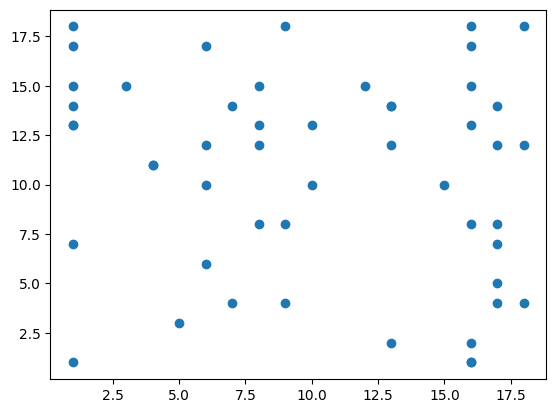

In [126]:
# Create dataset
from random import seed,random,randint
seed(1)#دانه دادن برای تولید اعداد رندوم که هر بار یک عدد رندم تولید کند 
x=np.zeros((50,2),dtype='int')
# generate random numbers between 0-1
for i in range(50):
   #value = random()#اعداد تصادفی بین صفر و یک با توزیع نرمال
   for j in range(2):
    value = randint(1,18)#تولید اعداد تصادفی صحیح بین استارت و استوپ
    x[i,j]+=value
   #print(x[i])
plt.scatter(x[:,0],x[:,1])

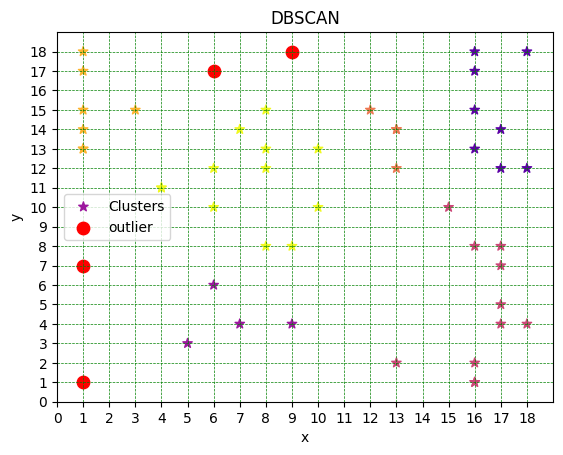

[ 1  1  0  0  1  2  3  4  5  5 -1  4  4  5  4  5  0  5  5  2  4  2  5  5
  0  2  5  0  2  2  3  5  0  4  2 -1  3  2  2  5  1  2 -1  0  5  0  3 -1
  4  2]
Estimated number of clusters: 6
Estimated number of noise points: 4


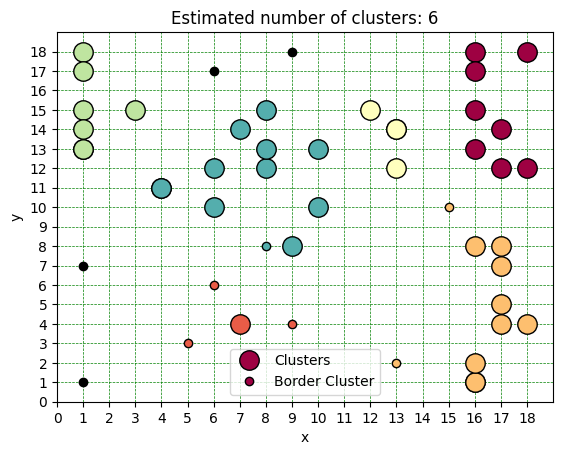

In [256]:

from sklearn.cluster import DBSCAN
# Compute DBSCAN
db1 = DBSCAN(eps=3, min_samples=3,metric='manhattan').fit(x)
my_plot(x,db1.labels_)
print(db1.labels_)
my_plot2(x,db1.labels_,db1)

In [252]:
X.shape

(750, 2)

## We use make_blobs to create n synthetic clusters.




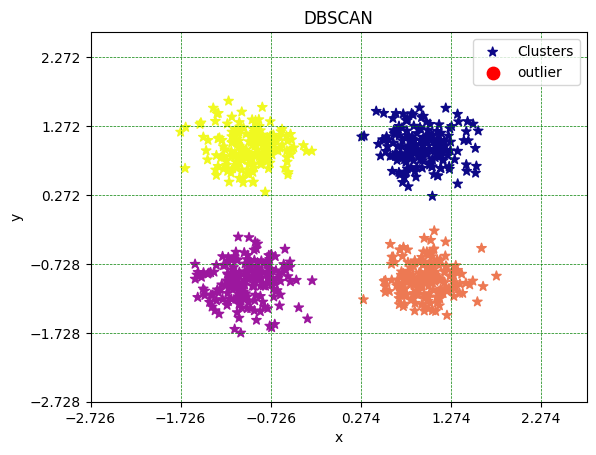

In [249]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[2, 2], [-1, -1], [2, -1],[-1,2]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)
my_plot(X,labels_true)

In [250]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

In [216]:
from sklearn import metrics
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.734
Completeness: 0.928
V-measure: 0.819
Adjusted Rand Index: 0.698
Adjusted Mutual Information: 0.818
Silhouette Coefficient: 0.562


Estimated number of clusters: 4
Estimated number of noise points: 3


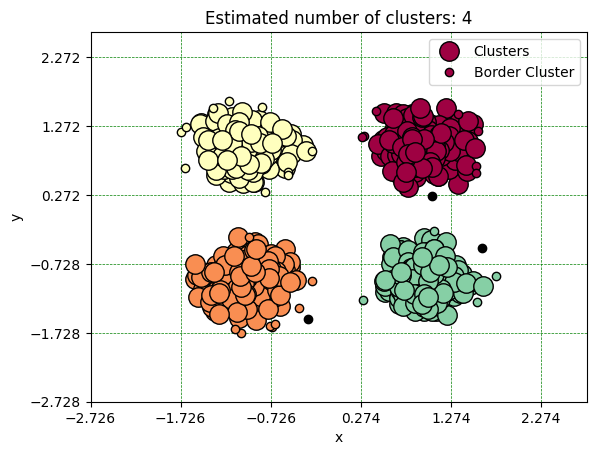

In [257]:
my_plot2(X,labels,db)